In [1]:
import os 
import zipfile

### Data Extraction

In [3]:
# Path to the zip file
zip_file_path = 'Dataset-zip\dog-breed-120.zip'

# Path to the dataset folder
dataset_folder = '.\Dataset-org'

# Create the dataset folder if it doesn't exist
os.makedirs(dataset_folder, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_folder)

print(f"Data extracted to {dataset_folder}")

Data extracted to .\Dataset-org


In [5]:
files_list = os.listdir(r"Dataset-org\Dogs class")

# Count the number of files
num_files = len(files_list)
print(num_files)

120


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
# Define the model architecture with Input layer
from tensorflow.keras.layers import Input
import random
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split

### Visualization and Label Extraction

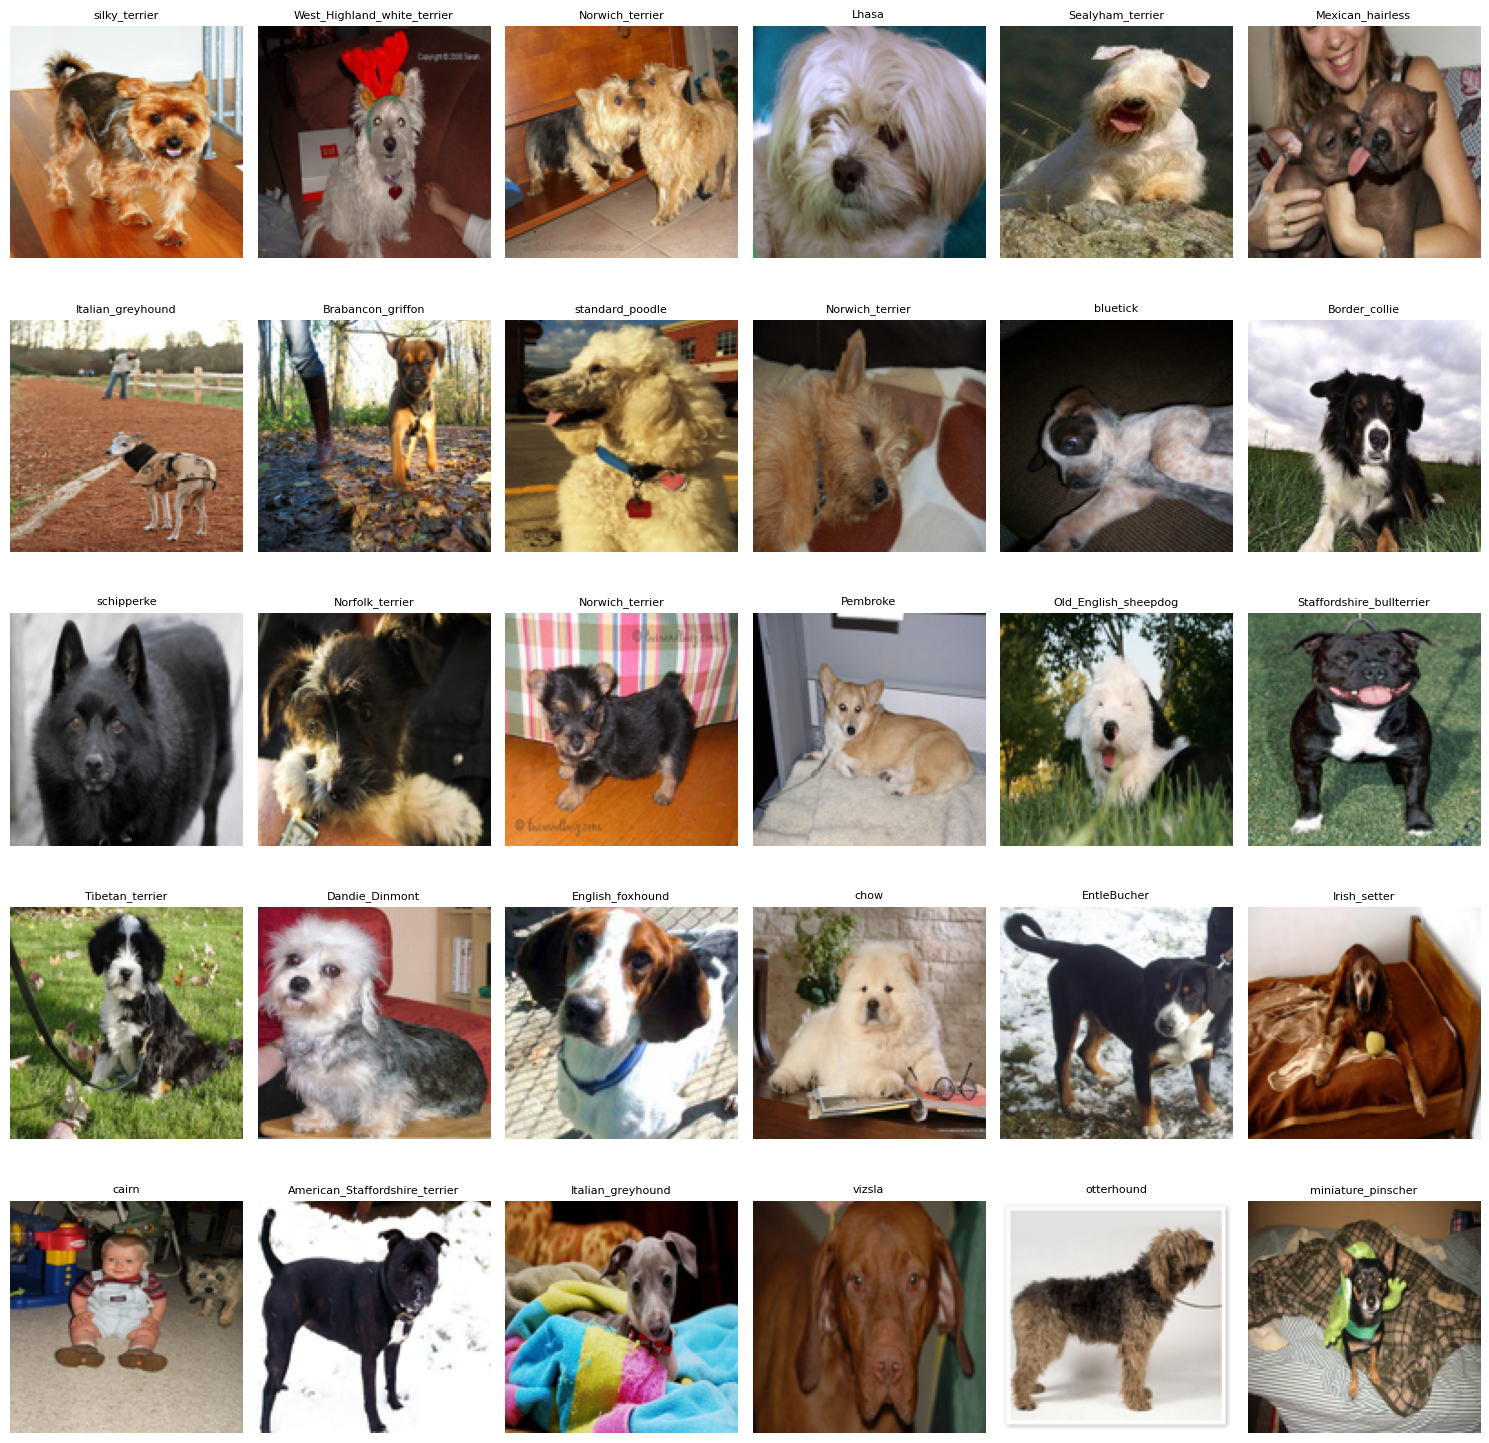

In [4]:
# path to the dataset
dataset_path = "Dataset-org/Dogs_class"

# lists to hold images and labels
image_paths = []
labels = []

# Traverse the dataset directory
for breed_folder in os.listdir(dataset_path):
    breed_folder_path = os.path.join(dataset_path, breed_folder)
    
    if os.path.isdir(breed_folder_path):  # Ensure it's a folder
        # Corrected breed label extraction
        breed_label = "-".join(breed_folder.split("-")[1:])  # Join all parts after the first one
        for img_file in os.listdir(breed_folder_path):
            if img_file.endswith(('png', 'jpg', 'jpeg')):  # Check for image extensions
                image_paths.append(os.path.join(breed_folder_path, img_file))
                labels.append(breed_label)

# Randomly select 30 images
selected_indices = random.sample(range(len(image_paths)), 30)
selected_images = [image_paths[i] for i in selected_indices]
selected_labels = [labels[i] for i in selected_indices]

# Define the fixed image size
fixed_size = (128, 128)

# Visualize the selected images
plt.figure(figsize=(15, 15))
for idx, img_path in enumerate(selected_images):
    plt.subplot(5, 6, idx + 1)  # 5 rows, 6 columns
    img = Image.open(img_path)
    img = img.resize(fixed_size)  # Resize image to 128x128 pixels
    plt.imshow(img)
    plt.title(selected_labels[idx], fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


### Labels and Total number of breeds

In [5]:
import numpy as np

unique_labels = np.unique(labels)
print('Labels:')
print('-------------------------------------------------------------------------')
print(unique_labels)
print('-------------------------------------------------------------------------')
print('total breeds: ',len(unique_labels))
print('-------------------------------------------------------------------------')

Labels:
-------------------------------------------------------------------------
['Afghan_hound' 'African_hunting_dog' 'Airedale'
 'American_Staffordshire_terrier' 'Appenzeller' 'Australian_terrier'
 'Bedlington_terrier' 'Bernese_mountain_dog' 'Blenheim_spaniel'
 'Border_collie' 'Border_terrier' 'Boston_bull' 'Bouvier_des_Flandres'
 'Brabancon_griffon' 'Brittany_spaniel' 'Cardigan'
 'Chesapeake_Bay_retriever' 'Chihuahua' 'Dandie_Dinmont' 'Doberman'
 'English_foxhound' 'English_setter' 'English_springer' 'EntleBucher'
 'Eskimo_dog' 'French_bulldog' 'German_shepherd'
 'German_short-haired_pointer' 'Gordon_setter' 'Great_Dane'
 'Great_Pyrenees' 'Greater_Swiss_Mountain_dog' 'Ibizan_hound'
 'Irish_setter' 'Irish_terrier' 'Irish_water_spaniel' 'Irish_wolfhound'
 'Italian_greyhound' 'Japanese_spaniel' 'Kerry_blue_terrier'
 'Labrador_retriever' 'Lakeland_terrier' 'Leonberg' 'Lhasa' 'Maltese_dog'
 'Mexican_hairless' 'Newfoundland' 'Norfolk_terrier' 'Norwegian_elkhound'
 'Norwich_terrier' 'Old_

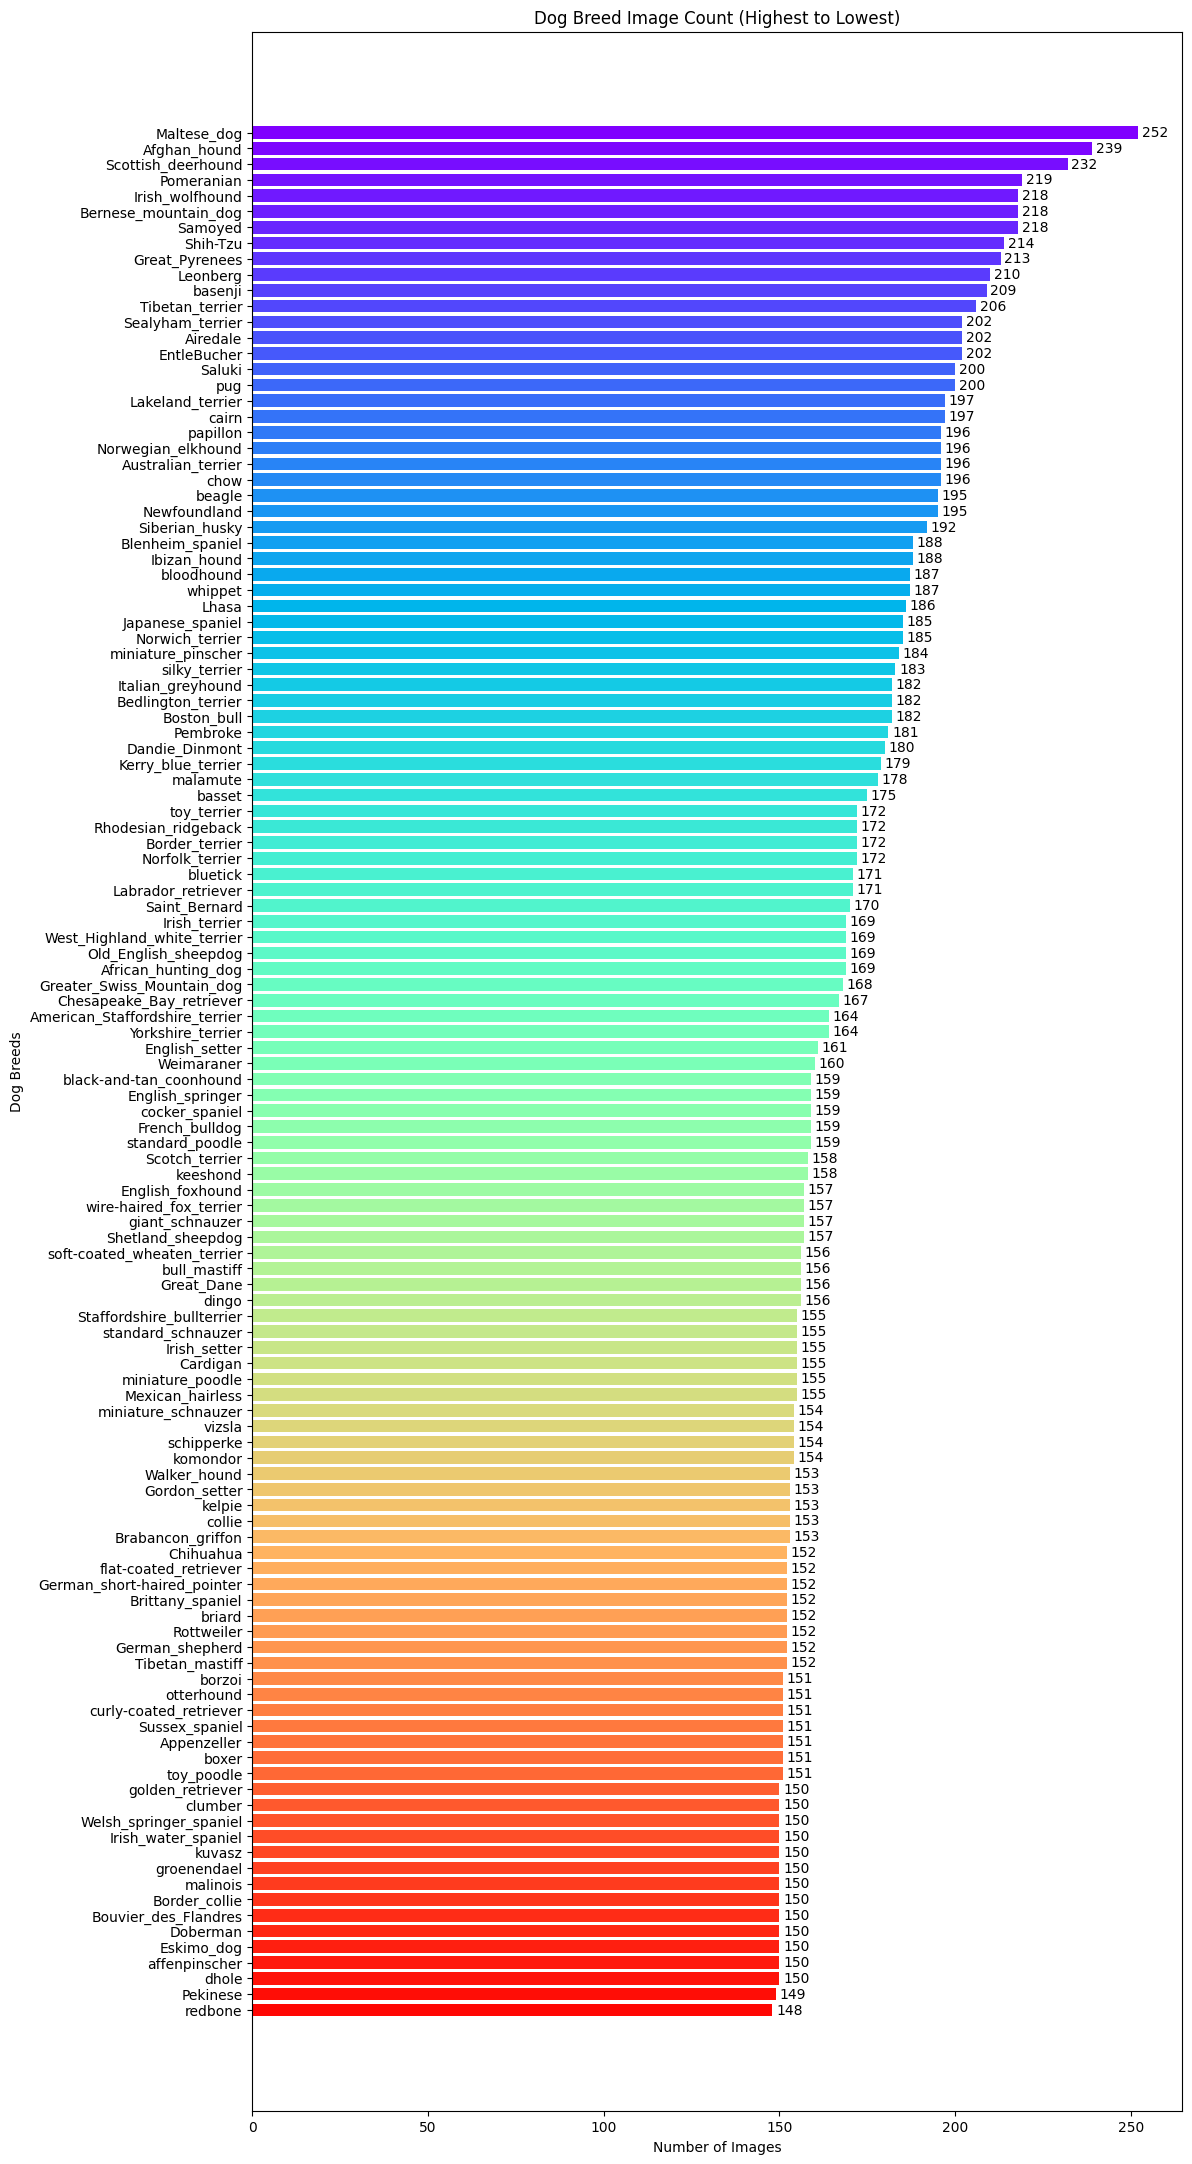

In [6]:
# Count each label's occurrences
label_counts = Counter(labels)

# Sort labels by count in descending order
sorted_labels = dict(label_counts.most_common())

# Extract data for plotting
breed_names = list(sorted_labels.keys())
counts = list(sorted_labels.values())

# Define a colormap for rainbow colors
colors = plt.cm.rainbow([i / len(counts) for i in range(len(counts))])

# Plot horizontal bar chart
plt.figure(figsize=(12, 27))  # Adjust figure size for better readability
bars = plt.barh(breed_names, counts, color=colors)
plt.xlabel("Number of Images")
plt.ylabel("Dog Breeds")
plt.title("Dog Breed Image Count (Highest to Lowest)")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

# Add count labels in front of each bar
for bar, count in zip(bars, counts):
    plt.text(count + 1, bar.get_y() + bar.get_height() / 2, str(count),
             va='center', ha='left', fontsize=10, color='black')

plt.show()

### Label Encoding

In [7]:
def convert_labels_to_rank(labels):
    # Count each label's occurrences
    label_counts = Counter(labels)
    
    # Sort labels by count in descending order and create a ranking map
    sorted_labels = label_counts.most_common()  # Sort by count
    label_rank_map = {label: rank + 1 for rank, (label, _) in enumerate(sorted_labels)}
    
    # Replace each label with its ranking number
    numeric_labels = [label_rank_map[label] for label in labels]
    
    return numeric_labels, label_rank_map

In [8]:
# Convert labels to ranked numbers
numeric_labels, label_rank_map = convert_labels_to_rank(labels)

print("Numeric Labels:", numeric_labels)
print("Label-to-Number Mapping:", label_rank_map)

Numeric Labels: [91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,

In [9]:
# check how many times Bernese_mountain_dog corresponds to 6 in numeric_labels
encoded_number_for_Bernese_mountain_dog = label_rank_map['Bernese_mountain_dog']
count_of_Bernese_mountain_dog_as_one = numeric_labels.count(encoded_number_for_Bernese_mountain_dog)

print(f"The label 'Bernese_mountain_dog' corresponds to number {encoded_number_for_Bernese_mountain_dog} and appears {count_of_Bernese_mountain_dog_as_one} times in numeric_labels.")

The label 'Bernese_mountain_dog' corresponds to number 6 and appears 218 times in numeric_labels.


In [10]:
# Check the length of numeric_labels
length_of_numeric_labels = len(numeric_labels)

# Print the length
print("Length of Numeric Labels:", length_of_numeric_labels)

Length of Numeric Labels: 20580


In [11]:
# Check the length of image_paths
length_of_image_paths = len(image_paths)

# Print the length
print("Length of Image Paths:", length_of_image_paths)

Length of Image Paths: 20580


### Train Test Split

In [41]:
def process_and_split_images(image_paths, labels, image_size=(128, 128), test_size=0.2, random_state=42):
    """
    Converts images from the specified paths to a numpy array, resizes them, and performs train-test split.

    Parameters:
        image_paths (list): List of image file paths.
        labels (list): List of labels corresponding to each image.
        image_size (tuple): Desired size to resize images, default is (32, 32).
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Random seed for reproducibility.

    Returns:
        X_train, X_test, y_train, y_test: Train-test split data for images and labels.
    """
    # Initialize an empty list to store the processed images
    images = []

    # Load each image, resize it, and add it to the images list
    for path in image_paths:
        img = Image.open(path).convert('RGB')  # Open image and ensure it's in RGB format
        img = img.resize(image_size, Image.BICUBIC) # Resize image to the specified size
        img_array = np.array(img)              # Convert image to numpy array
        images.append(img_array)               # Append the array to the list

    # Convert the list of images to a numpy array
    X = np.array(images)  # Shape will be (num_images, 32, 32, 3) for RGB images
    y = np.array(labels)  # Convert labels list to numpy array for consistency

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

In [42]:
# train test split
X_train, X_test, y_train, y_test = process_and_split_images(image_paths,numeric_labels)

In [20]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

16464
16464
4116
4116


In [21]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [43]:
print(X_train[1])
print(y_train[1])

[[[ 2  1  7]
  [ 2  1  7]
  [ 2  1  7]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 [[ 2  1  7]
  [ 2  1  7]
  [ 2  1  7]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 [[ 3  2  8]
  [ 3  2  8]
  [ 3  2  8]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 ...

 [[ 2  2  4]
  [ 2  2  4]
  [ 2  2  4]
  ...
  [ 6  6 16]
  [ 7  7 17]
  [ 7  7 17]]

 [[ 2  2  4]
  [ 2  2  4]
  [ 2  2  4]
  ...
  [ 6  6 16]
  [ 6  6 16]
  [ 5  5 15]]

 [[ 2  2  4]
  [ 2  2  4]
  [ 2  2  4]
  ...
  [ 6  6 16]
  [ 6  6 16]
  [ 4  4 14]]]
116


### Visualization after train test split

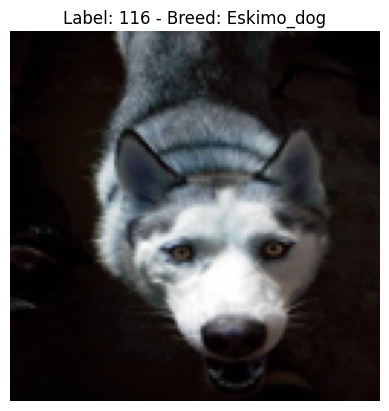

In [45]:
import cv2
import matplotlib.pyplot as plt

def show_image_with_label(image, label, label_rank_map):
    """
    Displays an image with the corresponding numeric and label name.

    Parameters:
        image (numpy array): The image to display.
        label (int): The numeric label (rank) of the dog breed.
        label_rank_map (dict): Dictionary mapping breed names to their numeric ranks.

    """
    # Find the breed name from label_rank_map using the numeric label
    breed_name = [key for key, value in label_rank_map.items() if value == label]

    # If breed_name list is not empty, get the first item, else show 'Unknown'
    breed_name = breed_name[0] if breed_name else 'Unknown'

    # Convert image to RGB (assuming it's in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with the title showing both label and breed name
    plt.imshow(image_rgb)
    plt.title(f"Label: {label} - Breed: {breed_name}")  # Display rank and breed name
    plt.axis('off')
    plt.show()

# Example usage
# Show the image at index 1 in y_train
show_image_with_label(X_train[1], y_train[1], label_rank_map)